<a href="https://colab.research.google.com/github/CarlVillachica/Algoritmos-Gen-ticos/blob/main/TAREAIA2ENVIAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Reconocedor de digitos a mano usando una red convolucional
Base de datos usada de http://yann.lecun.com/exdb/mnist/ (MNIST)

In [122]:
%tensorflow_version 2.x
#sirve para setear la version de tensorflow en colab

In [123]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
import pandas as pd
import math
import datetime
import platform

#Uso de python , tensorflow y keras

print('Se cargo de manera correcta')

Se cargo de manera correcta


In [124]:
%load_ext tensorboard
!rm -rf ./.logs/
#cargar debugger y limpiar cache

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [125]:
mnist_dataset = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist_dataset.load_data()
#cargando los datos

In [126]:
print('Se cargo de manera correcta')

Se cargo de manera correcta


In [127]:
x_train_normalized = x_train / 255
x_test_normalized = x_test / 255
#se normalizaron los datos de [0,255] a [0,1] 

Usando el modelo secuencial de Keras con 4 capas:

In [128]:
model = tf.keras.models.Sequential()

# Input layers.
model.add(tf.keras.layers.Flatten(input_shape=x_train_normalized.shape[1:]))
model.add(tf.keras.layers.Dense(
    units=128,
    activation=tf.keras.activations.relu,
    kernel_regularizer=tf.keras.regularizers.l2(0.002)
))

# Hidden layers.
model.add(tf.keras.layers.Dense(
    units=128,
    activation=tf.keras.activations.relu,
    kernel_regularizer=tf.keras.regularizers.l2(0.002)
))

# Output layers.
model.add(tf.keras.layers.Dense(
    units=10,
    activation=tf.keras.activations.softmax
))

In [129]:
adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(
    optimizer=adam_optimizer,
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    metrics=['accuracy']
)

In [130]:

log_dir=".logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

training_history = model.fit(
    x_train_normalized,
    y_train,
    epochs=10,
    validation_data=(x_test_normalized, y_test),
    callbacks=[tensorboard_callback]
)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.5186 - accuracy: 0.9233 - val_loss: 0.3325 - val_accuracy: 0.9486
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3011 - accuracy: 0.9539 - val_loss: 0.2617 - val_accuracy: 0.9596
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2617 - accuracy: 0.9604 - val_loss: 0.2422 - val_accuracy: 0.9661
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2389 - accuracy: 0.9635 - val_loss: 0.2208 - val_accuracy: 0.9693
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2244 - accuracy: 0.9655 - val_loss: 0.2120 - val_accuracy: 0.9673
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2145 - accuracy: 0.9660 - val_loss: 0.2052 - val_accuracy: 0.9688
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2047 - accuracy: 0.9689 - val_loss: 0.2433 - val_accuracy:

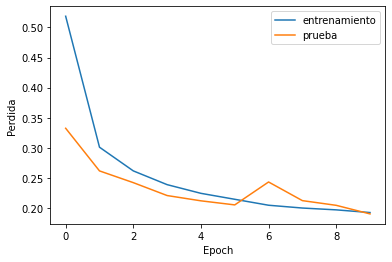

In [131]:
plt.xlabel('Epoch')
plt.ylabel('Perdida')
plt.plot(training_history.history['loss'], label='entrenamiento')
plt.plot(training_history.history['val_loss'], label='prueba')
plt.legend()

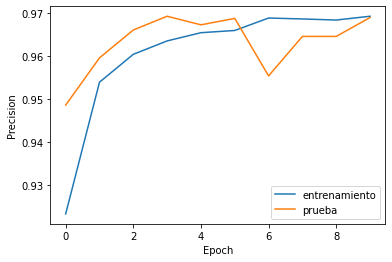

In [132]:
plt.xlabel('Epoch')
plt.ylabel('Precision')
plt.plot(training_history.history['accuracy'], label='entrenamiento')
plt.plot(training_history.history['val_accuracy'], label='prueba')
plt.legend()

In [133]:
%%capture
train_loss, train_accuracy = model.evaluate(x_train_normalized, y_train)

In [134]:
print('entramiento_perdida: ', train_loss)
print('entrenamiento_precision: ', train_accuracy)

entramiento_perdida:  0.17954833805561066
entrenamiento_precision:  0.9719833135604858


In [135]:
%%capture
validation_loss, validation_accuracy = model.evaluate(x_test_normalized, y_test)


In [136]:
print('contra el test')
print('test perdidas: ', validation_loss)
print('test_precision: ', validation_accuracy)

contra el test
test perdidas:  0.1902424693107605
test_precision:  0.968999981880188


Guardar modelo para probar

In [137]:
model_name = 'tareaia.h5'
model.save(model_name, save_format='h5')

In [138]:
loaded_model = tf.keras.models.load_model(model_name)

In [139]:
predictions_one_hot = loaded_model.predict([x_test_normalized])

In [140]:
print('predictions_one_hot:', predictions_one_hot.shape)

predictions_one_hot: (10000, 10)


In [141]:
pd.DataFrame(predictions_one_hot)

,0,1,2,3,4,5,6,7,8,9
0,4.131263e-06,2.051472e-06,6.109063e-05,9.859155e-05,1.118399e-07,9.129857e-06,9.447180e-10,9.991816e-01,4.065647e-06,6.391880e-04
1,1.858576e-04,8.334383e-03,9.742659e-01,1.586457e-02,1.648612e-08,8.103959e-05,3.245272e-05,7.767069e-06,1.227957e-03,7.346521e-08
2,4.699879e-05,9.876265e-01,6.483241e-04,1.488539e-04,1.991692e-04,7.710914e-05,1.272746e-04,2.520637e-03,8.552947e-03,5.216401e-05
3,9.980368e-01,3.753858e-05,9.771810e-04,4.773936e-05,7.208920e-06,2.249503e-04,1.142724e-04,2.401502e-04,1.406949e-05,3.000011e-04
4,1.619130e-04,2.661971e-05,1.771037e-04,1.418509e-05,9.957800e-01,3.584551e-05,2.538098e-04,6.027819e-04,9.497667e-05,2.852696e-03
...,...,...,...,...,...,...,...,...,...,...
9995,1.193599e-06,1.052228e-04,9.996771e-01,1.560663e-04,3.193466e-12,2.162135e-08,4.137944e-09,5.898882e-05,1.376844e-06,2.570895e-10
9996,1.136778e-07,1.545715e-04,2.176615e-04,9.948527e-01,3.077609e-09,4.703579e-03,2.977860e-10,3.438260e-05,1.434301e-05,2.270460e-05
9997,1.028429e-07,2.015547e-05,2.946468e-09,4.053897e-08,9.996087e-01,6.097751e-08,6.529203e-08,2.298900e-05,9.451995e-06,3.383710e-04
9998,1.607854e-05,9.150495e-05,3.557714e-07,5.345673e-04,9.838355e-08,9.980750e-01,2.191566e-05,1.065620e-06,1.245069e-03,1.429337e-05


In [142]:
predictions = np.argmax(predictions_one_hot, axis=1)
pd.DataFrame(predictions)

,0
0,7
1,2
2,1
3,0
4,4
...,...
9995,2
9996,3
9997,4
9998,5


Probando con el conjunto de digitos

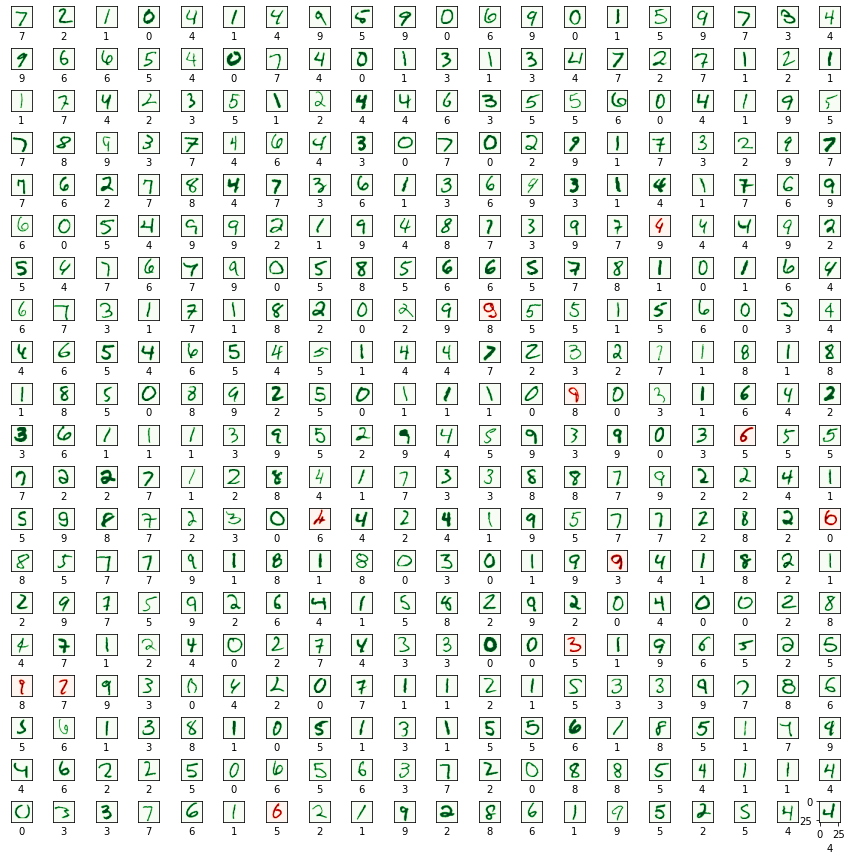

In [143]:
numbers_to_display = 400
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(15, 15))

for plot_index in range(numbers_to_display):    
    predicted_label = predictions[plot_index]
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    color_map = 'Greens' if predicted_label == y_test[plot_index] else 'Reds'
    plt.subplot(num_cells, num_cells, plot_index + 1)
    plt.imshow(x_test_normalized[plot_index], cmap=color_map)
    plt.xlabel(predicted_label)

plt.subplots_adjust(hspace=1, wspace=0.5)
plt.show()

Matriz de confusion

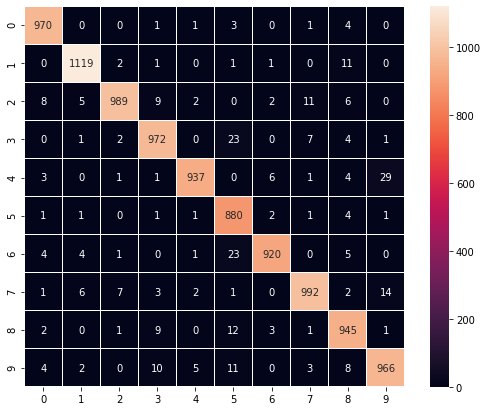

In [144]:
confusion_matrix = tf.math.confusion_matrix(y_test, predictions)
f, ax = plt.subplots(figsize=(9, 7))
sn.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.5,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()